#### 3. **Polynomial Regression**
- Models a non-linear relationship using a polynomial equation.
- Useful when data trends show a curve.
- Equation:  
  $
  Y = \beta_0 + \beta_1X + \beta_2X^2 + \ldots + \beta_nX^n + \varepsilon
  $


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# prepare the dataset

# Set seed for reproducibility
np.random.seed(42)

# Create synthetic 'Level' data
num_samples = 550
level = np.linspace(1, 10, num_samples)

# Generate non-linear 'Salary' (quadratic curve + noise)
salary = 10000 + (level ** 2) * 1500 + np.random.normal(0, 2000, num_samples)
salary = salary.round(2)

# Create DataFrame
dataset = pd.DataFrame({
    'Level': level,
    'Salary': salary
})

dataset.head(3)

,Level,Salary
0,1.000000,12493.43
1,1.016393,11273.05
2,1.032787,12895.35


In [40]:
# check the shape of dataset, check the null and fillna
dataset.shape
dataset.isnull().sum()

Level     0
Salary    0
dtype: int64

Data cleaning process ................

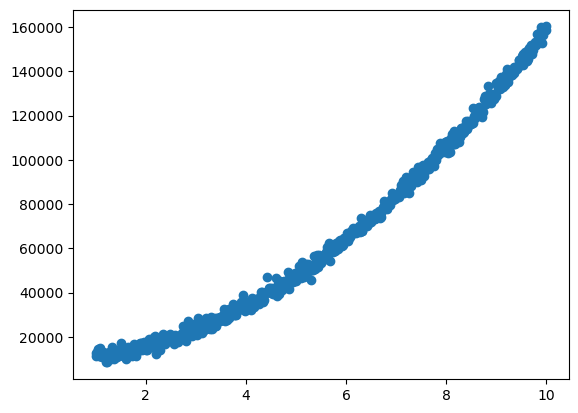

In [41]:
# now check the linearity between level and salary
plt.scatter(dataset["Level"], dataset["Salary"])
plt.show()

# you could see the graph is non linear

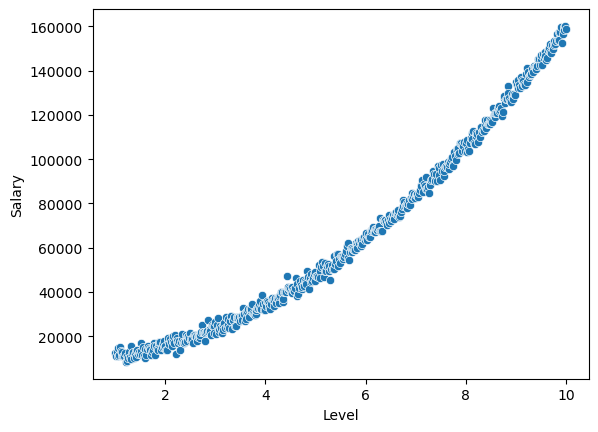

In [42]:
# lets check the scatterplot
sns.scatterplot(x= "Level", y= "Salary", data=dataset)
plt.show()

In [43]:
# checking the correlation between level and salary
dataset.corr()

# this is highly correlated 

,Level,Salary
Level,1.000000,0.978251
Salary,0.978251,1.000000


In [44]:
#feature selections

x = dataset[["Level"]]
y = dataset["Salary"]

In [45]:
# now convert to polynomial features 

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2) # degree 2 me m2x**2, if it not give proper line then will use degree 3

In [46]:
pf.fit(x)
pf.transform(x)

# now replace this with x

x= pf.transform(x)

In [47]:
# now train the model
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42 )

In [49]:
# now applying polinomial regression 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [50]:
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
# lets check the accuracy

lr.score(x_test, y_test)

0.9984515210567723

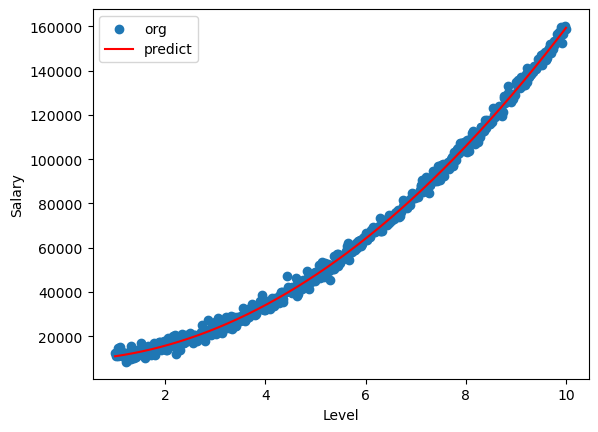

In [52]:
# now check the graph with prediction line
plt.scatter(dataset["Level"], dataset["Salary"])
plt.plot(dataset["Level"], lr.predict(x), c='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["org", "predict"])
plt.show()

In [53]:
# now check the m1 m2 and c
lr.coef_, lr.intercept_

(array([   0.        ,  384.52041254, 1464.59607967]), 9088.693926787768)

In [54]:
m1 = 384.52041254 
m2 = 1464.59607967 
c = 9088.693926787768

In [55]:
# now verify this using this data 
x = 1.032787	

#y= 12895.35 this we need to predict

y = m1  * x + m2 * x**2 + c
y

11048.03153537833

In [56]:
# before using predict we need to convert data to polynomial
test = pf.transform([[1.032787]])
test

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.        , 1.032787  , 1.06664899]])

In [57]:
# now verify this using prediction model
lr.predict(test)

array([11048.03153538])

Verified, both are same and are closest to y= 12895.35